# 美团北京星巴克数据分析（基于Pandas）

- 网页：https://bj.meituan.com/s/%E6%98%9F%E5%B7%B4%E5%85%8B/
- Pandas教程: https://pandas.pydata.org/docs/user_guide/10min.html

**分析目标**:
1. 所有门店按评分从高到低排序
2. 通过门店的商圈 （areaname）结合北京区域数据给每个门店添加新字段 area 表示其所属的北京区域（如朝阳区、西城区）
3. 按照北京区域分组所有门店
4. 统计各个区域的门店数量，找出拥有星巴克门店数量最多的三个区域
5. 统计各个区域星巴克门店的平均评分，找出平均评分最好的北京区域
6. 找出拥有最多星巴克门店且平均评分最高的商圈（areaname）

In [ ]:
# Fist, load data

import pandas as pd

beijing_starbucks_csv_file = "beijing-starbucks.csv"
data = pd.read_csv(beijing_starbucks_csv_file)

data.head()


,id,title,avgscore,areaname,backCateName
0,598894939,星巴克（北京门头沟长安天街店）,4.1,门头沟城区,咖啡厅
1,195215506,星巴克（未来中心店）,4.3,北七家,咖啡厅
2,50090428,星巴克（北京房山北关西路店）,4.4,良乡,咖啡厅
3,192951735,星巴克（北京昌平悦荟店）,4.0,昌平镇,咖啡厅
4,5823459,星巴克（北京西站第一店）,3.9,北京西站/六里桥,咖啡厅


1. 所有门店按评分从高到低排序

In [ ]:
sorted_data = data.sort_values(by="avgscore", ascending=False)

sorted_data.head()

,id,title,avgscore,areaname,backCateName
402,1186879667,星巴克（北京大成路物美店）,4.7,青塔,咖啡厅
382,1186879667,星巴克（北京大成路物美店）,4.7,青塔,咖啡厅
16,1113374444,星巴克（北京路劲世界城店）,4.6,昌平镇,咖啡厅
306,932547723,星巴克（北京泛海国际商街店）,4.6,姚家园,咖啡厅
220,1457682522,星巴克（北京橡树澜湾店）,4.6,卢沟桥,咖啡厅


2. 通过门店的商圈 （areaname）结合北京区域数据给每个门店添加新字段 area 表示其所属的北京区域（如朝阳区、西城区）

In [ ]:
import json

area_data = {}
with open("beijing-area.json", "r", encoding="utf-8") as f:
    area_data = json.load(f)

# 返回商圈所属于的区
def to_area(areaname: str) -> str:
    for k, v in area_data.items():
        if areaname == k or areaname in v:
            return k
    return "未知"

# 测试
to_area("酒仙桥") == "朝阳区"

True

In [ ]:
area_column = data["areaname"].apply(to_area)
data.insert(4, "area", area_column)
data.head()

,id,title,avgscore,areaname,area,backCateName
0,598894939,星巴克（北京门头沟长安天街店）,4.1,门头沟城区,门头沟区,咖啡厅
1,195215506,星巴克（未来中心店）,4.3,北七家,昌平区,咖啡厅
2,50090428,星巴克（北京房山北关西路店）,4.4,良乡,房山区,咖啡厅
3,192951735,星巴克（北京昌平悦荟店）,4.0,昌平镇,昌平区,咖啡厅
4,5823459,星巴克（北京西站第一店）,3.9,北京西站/六里桥,丰台区,咖啡厅


3. 按照北京区域分组所有门店

In [ ]:
grouped_data = data.groupby("area")

grouped_data.first()

,id,title,avgscore,areaname,backCateName
area,,,,,
东城区,159988078,星巴克（北京东直门来福士一店）,4.4,东直门,咖啡厅
丰台区,5823459,星巴克（北京西站第一店）,3.9,北京西站/六里桥,咖啡厅
大兴区,50168849,星巴克臻选（北京欣宁大街店）,4.2,西红门,咖啡厅
密云区,1132796034,星巴克（北京密云鼓楼南大街店）,3.8,密云县县城,咖啡厅
平谷区,760147141,星巴克（北京平谷国泰店）,4.3,平谷城区,咖啡厅
延庆区,1216288205,星巴克（北京延庆万达店）,4.3,延庆城区,咖啡厅
怀柔区,175350734,星巴克（北京怀柔万达店）,4.0,商业街,咖啡厅
房山区,50090428,星巴克（北京房山北关西路店）,4.4,良乡,咖啡厅
昌平区,195215506,星巴克（未来中心店）,4.3,北七家,咖啡厅


4. 统计各个区域的门店数量，找出拥有星巴克门店数量最多的三个区域

In [ ]:
store_totals = grouped_data.size()
store_totals = store_totals.sort_values(ascending=False)
store_totals.head(3)

area
朝阳区    210
海淀区     81
丰台区     52
dtype: int64

5. 统计各个区域星巴克门店的平均评分，找出平均评分最好的北京区域

In [ ]:
area_avgscores = grouped_data["avgscore"].mean()
area_avgscores = area_avgscores.sort_values(ascending=False)
area_avgscores.head(1)

area
房山区    4.385714
Name: avgscore, dtype: float64

6. 分别找出拥有最多星巴克门店和平均评分最高的商圈（areaname）

In [ ]:
# 按商圈分组
areaname_grouped_data = data.groupby("areaname")

# 计算各个商圈的门店数量和平均评分
areaname_totals = areaname_grouped_data.size()
areaname_totals.name = "total"
areaname_avgscores = areaname_grouped_data["avgscore"].mean()

merged_data = pd.merge(areaname_totals, areaname_avgscores, how="outer", on="areaname")

print("拥有最多星巴克门店的商圈:")
merged_data.sort_values("total", ascending=False).head(5)


拥有最多星巴克门店的商圈:


,total,avgscore
areaname,,
望京,23,4.256522
国贸/建外,22,4.272727
大望路,17,3.952941
首都机场,16,3.681250
朝外大街,14,4.278571


In [ ]:
print("拥有最高平均评分的商圈:")
merged_data.sort_values("avgscore", ascending=False).head(5)

拥有最高平均评分的商圈:


,total,avgscore
areaname,,
卢沟桥,1,4.600000
北大地/万丰路,1,4.600000
北下关,1,4.600000
青塔,3,4.566667
万柳,1,4.500000


In [ ]:
print("拥有最多星巴克门店且平均评分大于 4.1 的商圈")
merged_data[merged_data["avgscore"] > 4.1].sort_values("total", ascending=False).head()

拥有最多星巴克门店且平均评分大于 4.1 的商圈


,total,avgscore
areaname,,
望京,23,4.256522
国贸/建外,22,4.272727
朝外大街,14,4.278571
亦庄,13,4.176923
亮马桥/三元桥,13,4.300000


## 可视化

In [ ]:
import matplotlib.pyplot as plt

拥有最多星巴克门店且平均评分大于 4.1 的商圈


<Axes: title={'center': '拥有最多星巴克门店且平均评分大于 4.1 的商圈'}, xlabel='areaname'>

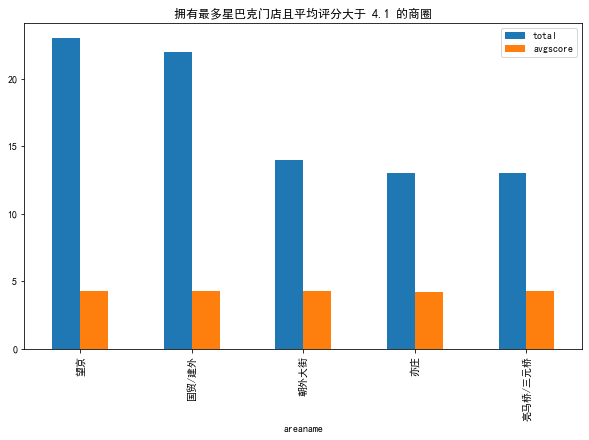

In [22]:
print("拥有最多星巴克门店且平均评分大于 4.1 的商圈")
result = merged_data[merged_data["avgscore"] > 4.1].sort_values("total", ascending=False).head()
result.plot(kind="bar", figsize=[10, 6], title="拥有最多星巴克门店且平均评分大于 4.1 的商圈")

In [15]:
import matplotlib
print(matplotlib.matplotlib_fname())

c:\Development\Python-3.10\lib\site-packages\matplotlib\mpl-data\matplotlibrc
